# exp1. Find hyper parameter w/o compound scaling

In [11]:
import os
import sys
import argparse

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from result_utils import read_config, result_data, unique_average, visualize


In [12]:
CONFIG_FNAME = 'exp1'
configs = read_config(CONFIG_FNAME)

RESULT_ROOT_DIR = '../results/' + CONFIG_FNAME
result_path = RESULT_ROOT_DIR + '/' + 'test_results.txt'
results = []
with open(result_path, 'r') as f:
    for line in f:
        x = line.strip().split(',')
        acc = x[1]
        results.append(acc)
results = np.array(results, dtype=float)

N = len(configs)
print('# of experiments: %d'%N)

# of experiments: 280


In [21]:
best_idx = np.argmax(results)
print(configs[best_idx])
print(results[best_idx])

OrderedDict([('case_num', 112), ('dataset', 'exp_freq'), ('normalization', True), ('batch_size', 32), ('max_epoch', 60), ('optimizer', 'adam'), ('learning_rate', 0.001), ('lr_step', 30), ('lr_decay', 0.1), ('l2_decay', 1e-06), ('use_tensorboard', False), ('model_name', 'cnn1d_adaptive'), ('alpha', 1.0), ('beta', 1.0), ('gamma', 1.0), ('phi', 1.0), ('loss_fn', 'cross_entropy'), ('kernel_size', 13)])
0.9861111111111112


## 1. learning rate

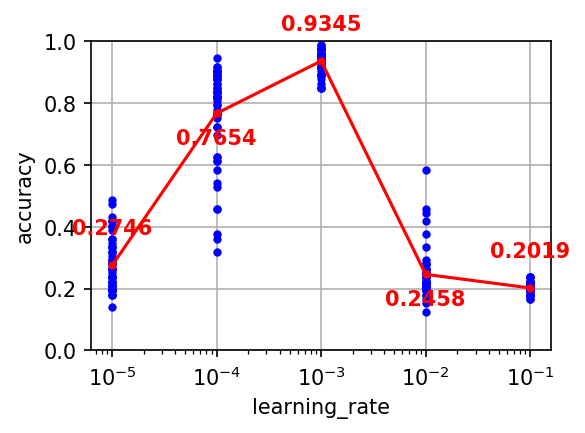

In [14]:
lra, acca = result_data('learning_rate', configs, results)
lru, accm = unique_average(lra, acca)

visualize(lra, acca, lru, accm, label='learning_rate', avg_line=True, xscale='log')

## 2. Kernel Size

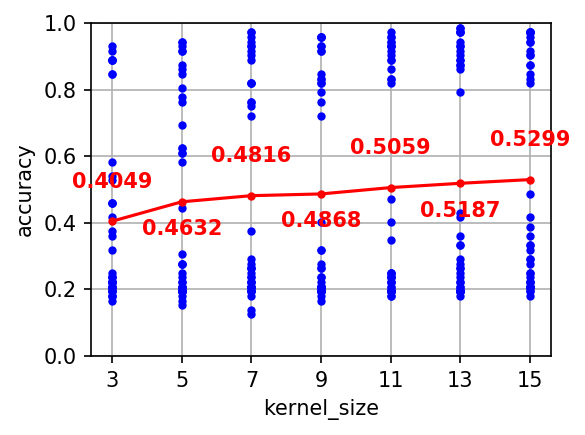

In [15]:
ksa, acca = result_data('kernel_size', configs, results)
ksu, accm = unique_average(ksa, acca)

visualize(ksa, acca, ksu, accm, label='kernel_size', avg_line=True)

### 2-1. Only lr = 1e-3

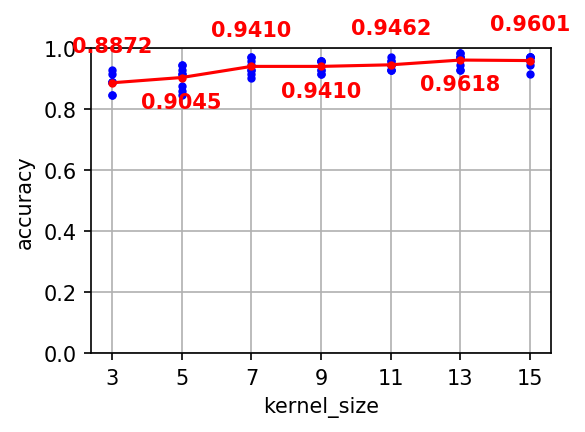

In [16]:
ids = np.where(lra==1e-3)[0]
ksa_c, acca_c = ksa[ids], acca[ids]
ksu_c, accm_c = unique_average(ksa_c, acca_c)

visualize(ksa_c, acca_c, ksu_c, accm_c, label='kernel_size', avg_line=True)

## 3. Normalization

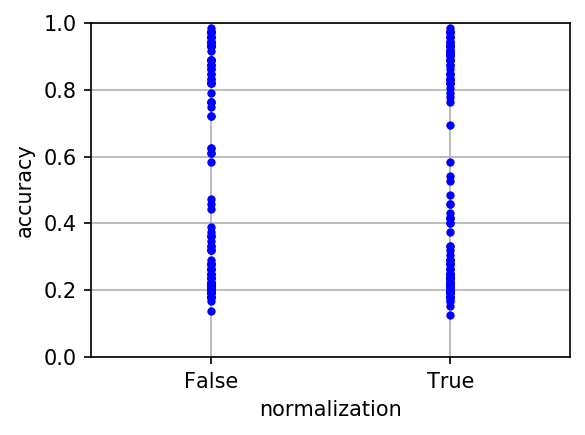

In [17]:
nrma, acca = result_data('normalization', configs, results)
nrmu, accm = unique_average(nrma, acca)

visualize(nrma, acca, nrmu, accm, label='normalization')

### 3-1. Only lr = 1e-3 & ks = 13

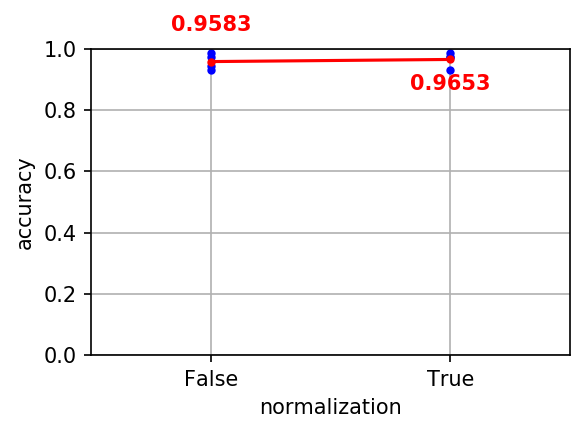

In [18]:
ids = np.logical_and(lra==1e-3,ksa==13)
nrma_c, acca_c = nrma[ids], acca[ids]
nrmu_c, accm_c = unique_average(nrma_c, acca_c)

visualize(nrma_c, acca_c, nrmu_c, accm_c, label='normalization', avg_line=True)

## 4. L2 regularization weight

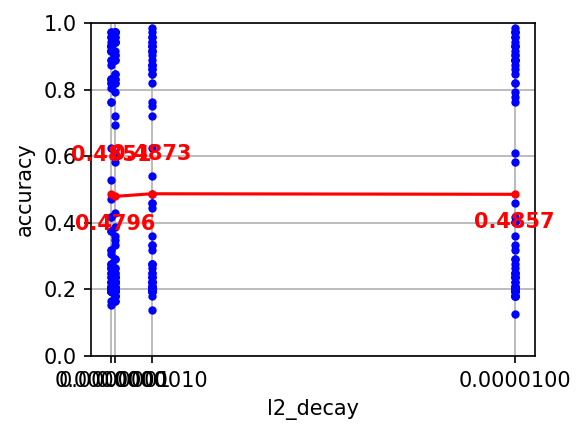

In [19]:
l2a, acca = result_data('l2_decay', configs, results)
l2u, accm = unique_average(l2a, acca)

visualize(l2a, acca, l2u, accm, label='l2_decay', avg_line=True)

### 4-1. Only lr = 1e-3 & ks = 13

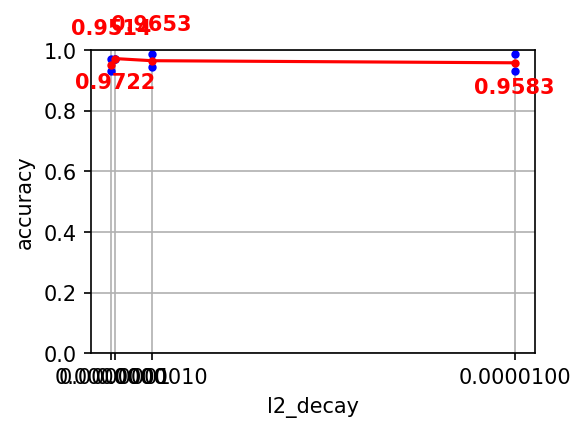

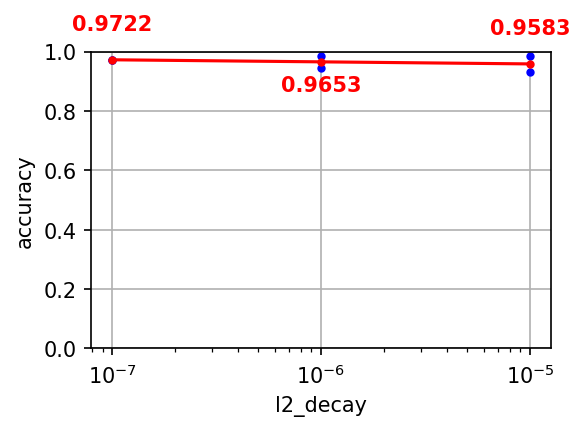

In [20]:
ids = np.logical_and(lra==1e-3,ksa==13)
l2a_c, acca_c = l2a[ids], acca[ids]
l2u_c, accm_c = unique_average(l2a_c, acca_c)

visualize(l2a_c, acca_c, l2u_c, accm_c, label='l2_decay', avg_line=True)
visualize(l2a_c[1:], acca_c[1:], l2u_c[1:], accm_c[1:], label='l2_decay', avg_line=True, xscale='log')

# Conclusion

* initial lr = 1e-3
* kernel size = 3 (see the exp1-1 result. NOT 13)
* normalization = True
* L2 decay = 1e-7